In [13]:
import os
import librosa
import noisereduce as nr
import soundfile as sf

# Define the main directory where your dataset is located
main_directory = 'C:\\Users\\asus\\Downloads\\Sounds'  # Replace with the path to your main directory

# Loop through each day subdirectory
for day_folder in os.listdir(main_directory):
    day_path = os.path.join(main_directory, day_folder)
    
    # Loop through audio files in the current day subdirectory
    for audio_file in os.listdir(day_path):
        audio_file_path = os.path.join(day_path, audio_file)
        
        # Check if it's an audio file (you can customize the file extensions)
        if audio_file.endswith('.wav') or audio_file.endswith('.mp3'):
            # Load the audio
            y, sr = librosa.load(audio_file_path, sr=None)
            
            # Apply noise reduction
            reduced_noise = nr.reduce_noise(y=y, sr=sr)
            
            # Save the denoised audio in the same directory
            denoised_file_path = os.path.join(day_path, f'denoised_{audio_file}')
            sf.write(denoised_file_path, reduced_noise, sr)
            
            print(f'Denoised and saved: {denoised_file_path}')


Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 1\denoised_Day _1_morning.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 1\denoised_Day_1_afternoon.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 1\denoised_Day_1_Evening.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 1\denoised_Day_1_night.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 2\denoised_Day_2_afternoon.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 2\denoised_Day_2_evining.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 2\denoised_Day_2_morning.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 2\denoised_Day_2_night.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 3\denoised_Day_3_afternoon.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 3\denoised_Day_3_evening.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 3\denoised_Day_3_morning.wav
Denoised and saved: C:\Users\asus\Downloads\Sounds\Day 3\denoised_Day_3_n

C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


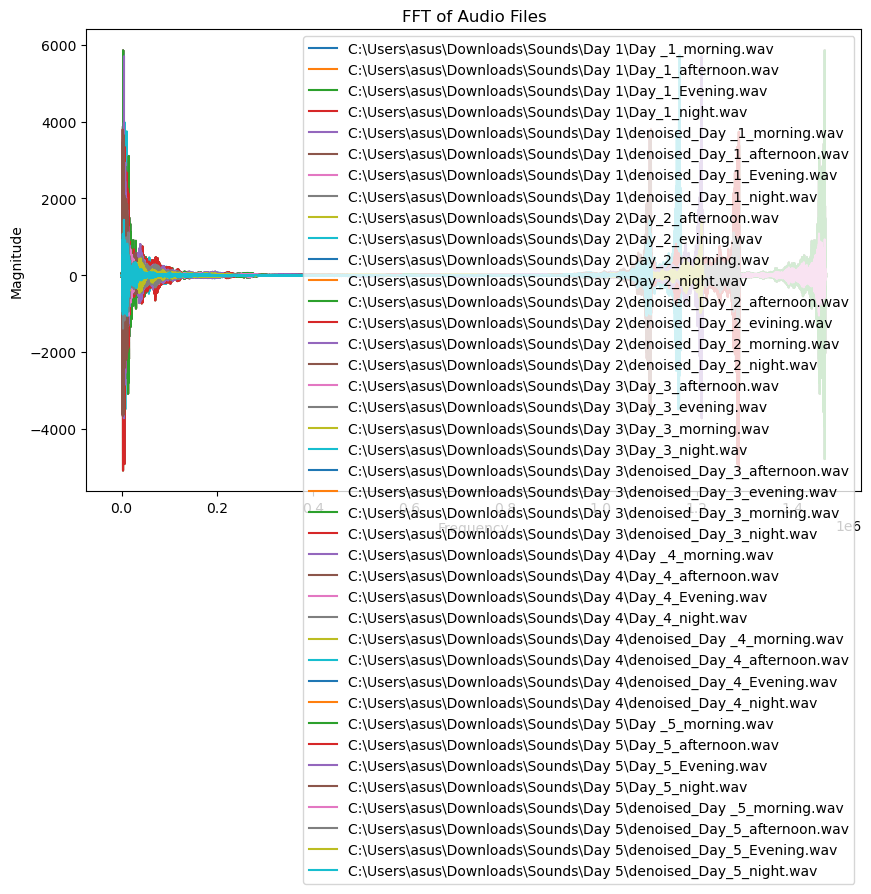

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


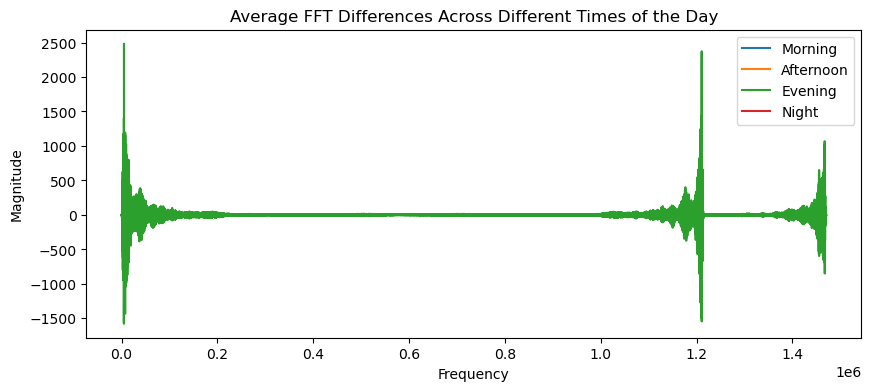

In [20]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

main_directory = 'C:\\Users\\asus\\Downloads\\Sounds'
audio_files = []

# Loop through each day subdirectory
for day_folder in os.listdir(main_directory):
    day_path = os.path.join(main_directory, day_folder)
    
    # Loop through audio files in the current day subdirectory
    for audio_file in os.listdir(day_path):
        audio_file_path = os.path.join(day_path, audio_file)
        
        if audio_file.endswith('.wav') or audio_file.endswith('.mp3'):
            audio_files.append(audio_file_path)

audio_data = []

for audio_file_path in audio_files:
    try:
        audio, sr = librosa.load(audio_file_path, sr=None)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)

        audio_features = {
            'file_path': audio_file_path,
            'sampling_rate': sr,
            'zero_crossing_rate': zero_crossing_rate,
            'spectral_centroid': spectral_centroid
        }
        audio_data.append(audio_features)

        audio = librosa.load(audio_file_path, sr=audio_features['sampling_rate'])[0]
        fft_result = np.fft.fft(audio)
        audio_features['fft'] = fft_result
    except Exception as e:
        print(f"Error processing {audio_file_path}: {e}")

if not audio_data:
    print("No valid audio files found.")
else:
    plt.figure(figsize=(10, 6))
    for audio_features in audio_data:
        plt.plot(audio_features['fft'], label=audio_features['file_path'])

    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('FFT of Audio Files')
    plt.legend()
    plt.show()

    max_fft_length = max(len(audio_features['fft']) for audio_features in audio_data)
    for audio_features in audio_data:
        fft = audio_features.get('fft', np.zeros(max_fft_length))  # Default to zero-filled array if 'fft' is missing
        padded_fft = np.pad(fft, (0, max_fft_length - len(fft)), 'constant')  # Zero-padding

        audio_features['padded_fft'] = padded_fft

    avg_fft_by_time = {}
    for time_of_day in ['Morning', 'Afternoon', 'Evening', 'Night']:
        audio_files_in_time = [audio_features for audio_features in audio_data if time_of_day in audio_features['file_path']]
        avg_fft = np.mean([audio_features['padded_fft'] for audio_features in audio_files_in_time], axis=0)
        avg_fft_by_time[time_of_day] = avg_fft

    plt.figure(figsize=(10, 4))
    for time_of_day, avg_fft in avg_fft_by_time.items():
        plt.plot(avg_fft, label=time_of_day)

    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Average FFT Differences Across Different Times of the Day')
    plt.legend()
    plt.show()
